In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch, csd, find_peaks
from scipy.linalg import svd
import pandas as pd

folder_inp = 'data/'            # input folder name
file_inp = 'acce'         # data input file name
folder_out = 'res/'             # output folder name

filepath_inp = folder_inp + file_inp + '.mat'
print(filepath_inp)

data/acce.mat


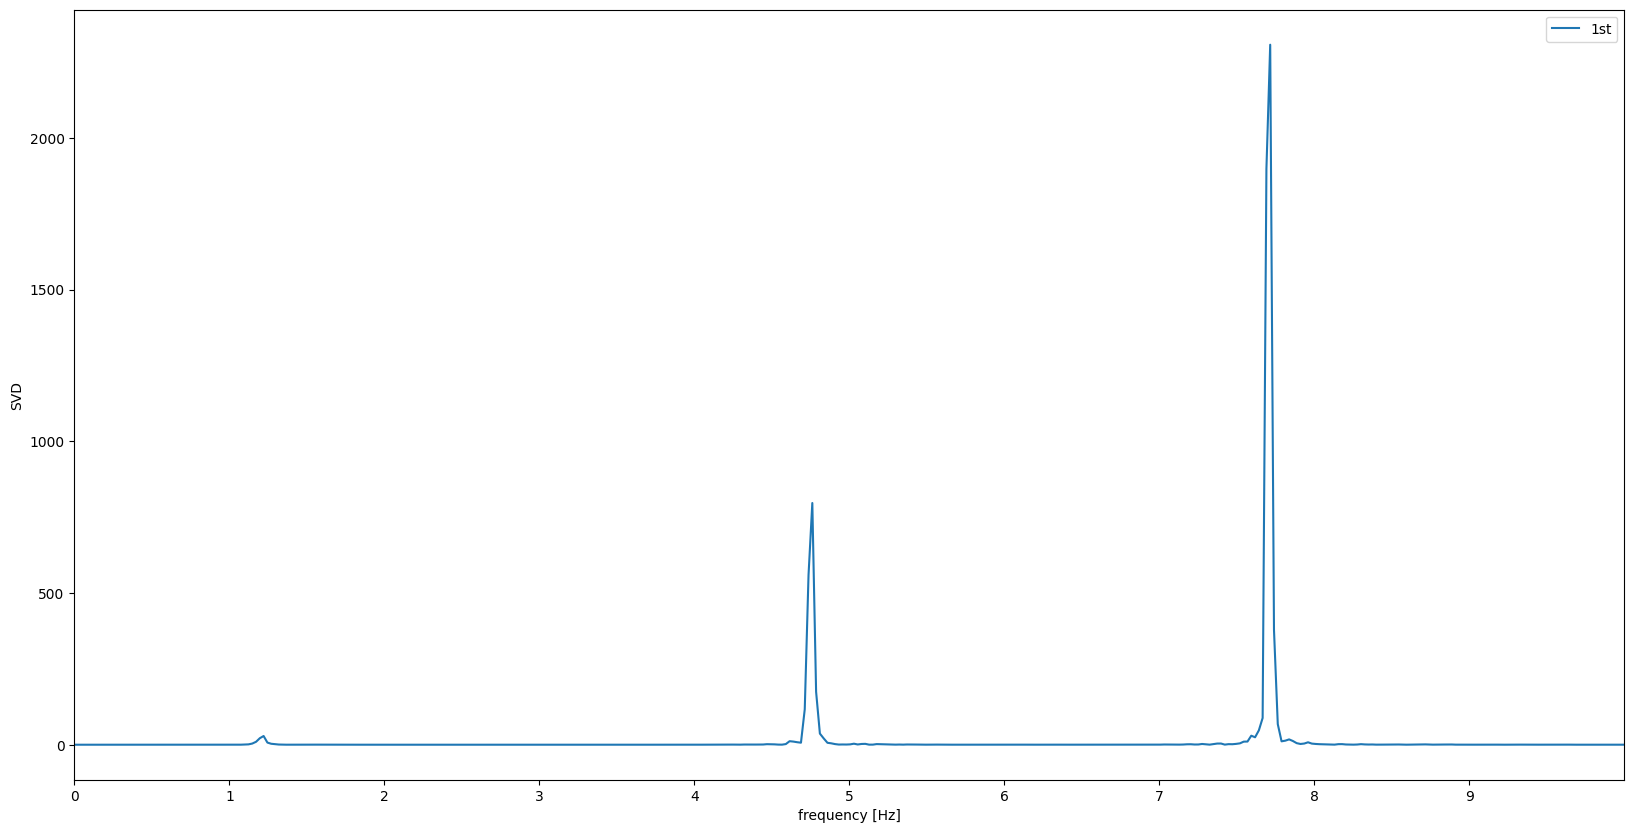

Top 3 peak values and their corresponding frequencies:
Peak 1: Frequency = 1.221 Hz
Peak 2: Frequency = 4.761 Hz
Peak 3: Frequency = 7.715 Hz

Corresponding mode shapes for the top peaks:
Mode Shape 1: [-0.50082179+3.37674722e-20j -0.58844538+7.61925370e-04j
 -0.63475089+5.36166097e-04j] 
Mode Shape 2: [-0.74201127+1.46033784e-19j -0.08753673+2.59512234e-03j
  0.66463367+3.45700745e-03j] 
Mode Shape 3: [-0.44513175+2.63178398e-20j  0.80456763-1.64086973e-03j
 -0.39309413+1.72236569e-03j] 


In [2]:

# Load acceleration data from the .mat file
data = scipy.io.loadmat(filepath_inp) # Replace with the correct file path
Acc = data['a'].T 
FS = 100  # Sampling frequency

# Number of degrees of freedom
DOF = Acc.shape[1]

# Compute the CPSD matrix
nperseg = 4096
PSD = np.zeros((DOF, DOF, nperseg//2 + 1), dtype=complex)

for i in range(DOF):
    for j in range(DOF):
        f, Pxy = csd(Acc[:, i], Acc[:, j], fs=FS, nperseg=nperseg)
        PSD[i, j, :] = Pxy

# Frequency domain decomposition
modes = []
frequencies = []
s1 = []
for l in range(PSD.shape[2]):
    U, S, _ = svd(PSD[:, :, l])
    if len(S) > 0:
        frequencies.append(f[l])
        modes.append(U[:, 0])
        s1.append(S[0])

df_S1 = pd.DataFrame(s1).T
df_U1 = pd.DataFrame(modes).T
freqs_1 = np.array(frequencies)

# Increase the precision of displayed frequency values


plt.figure(figsize=(20,10))
plt.xlim((0, 10))
plt.xticks(np.arange(0, 10, 1)) 
Plot_Log10 = False
if Plot_Log10 == True:
    plt.plot(freqs_1, (10*np.log10(s1)), label="1st")
else:
    plt.plot(freqs_1, (s1), label="1st")
plt.xlabel('frequency [Hz]')
plt.ylabel('SVD')
plt.legend(loc="upper right")
plt.show()

peak_indices, _  = find_peaks(np.abs(s1), height=0, distance=100)  

peak_values = np.abs(s1)[peak_indices]

# Sort and select the three largest peaks
top_n = 3
sorted_indices = np.argsort(peak_values)[-top_n:]
sorted_peak_values = peak_values[sorted_indices]
sorted_peak_indices = peak_indices[sorted_indices]

# Keep only the top three peak values and their indices

top_peak_values = sorted_peak_values[:top_n]
top_peak_indices = sorted_peak_indices[:top_n]

# Display the top three frequency values with higher precision
top_freqs_1 = freqs_1[top_peak_indices]

print("Top 3 peak values and their corresponding frequencies:")
for i in range(top_n):
    print(f"Peak {i+1}: Frequency = {freqs_1[sorted_peak_indices][i]:.3f} Hz")

# Display the corresponding df_U1 values for the top peaks
top_df_U1 = df_U1[top_peak_indices]

print("\nCorresponding mode shapes for the top peaks:")
for i in range(top_n):
    print(f"Mode Shape {i+1}: {df_U1[sorted_peak_indices].iloc[:,i].to_numpy()} ")